In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
mps_device = torch.device("cuda:1")
from constants.filepath import PROJECT_PATH
%matplotlib widget

In [2]:
residuals = np.load(os.path.join(PROJECT_PATH, 'model_data', 'training_residuals.npz'))['residuals']
command_data = np.load(os.path.join(PROJECT_PATH, 'model_data', 'training_command_data.npz'))['command_data']
analytical_data = np.load(os.path.join(PROJECT_PATH, 'model_data', 'training_analytical_data.npz'))['analytical_data']

test_residuals = np.load(os.path.join(PROJECT_PATH, 'model_data', 'test_residuals.npz'))['residuals']
test_command = np.load(os.path.join(PROJECT_PATH, 'model_data', 'test_command_data.npz'))['command_data']
test_analytical = np.load(os.path.join(PROJECT_PATH, 'model_data', 'test_analytical_data.npz'))['analytical_data']


input_data = np.stack((command_data, analytical_data), axis=1)
# input_features = torch.tensor(analytical_data, dtype=torch.float32, device=mps_device).view(-1, 1)
input_features = torch.tensor(input_data, dtype=torch.float32, device='cpu')
target_residuals = torch.tensor(residuals, dtype=torch.float32, device='cpu').view(-1, 1)

test_input_data = np.stack((test_command, test_analytical), axis=1)
test_input_features = torch.tensor(test_input_data, dtype=torch.float32, device='cpu')
test_target_residuals = torch.tensor(test_residuals, dtype=torch.float32, device='cpu').view(-1, 1)

print("input_features shape:", input_features.shape)
print("target_residuals shape:", target_residuals.shape)

input_features shape: torch.Size([2338665, 2])
target_residuals shape: torch.Size([2338665, 1])


In [3]:
class BigManBlastoiseDataset(torch.utils.data.Dataset):
    def __init__(self, input_features, target_residuals):
        self.data_length = input_features.shape[0]
        self.input_features = input_features
        self.target_residuals = target_residuals
    def __getitem__(self, idx):
        return self.input_features[idx], self.target_residuals[idx]
    def __len__(self):
        return self.data_length

In [ ]:
train_dataset= BigManBlastoiseDataset(input_features, target_residuals)
val_dataset = BigManBlastoiseDataset(test_input_features, test_target_residuals)
# random_split = torch.utils.data.random_split
# train_ratio = 0.9
# train_dataset, val_dataset = random_split(dataset, [int(len(dataset)*train_ratio), len(dataset) - int(len(dataset)*train_ratio)])
# 524288
# 1048576
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1000, shuffle=True)


data_batch, data_label = next(iter(train_dataloader))
val_data_batch, val_data_label = next(iter(val_dataloader))

print(data_batch.shape)
print(data_label.shape)
print(data_batch.device)

torch.Size([100, 2])
torch.Size([100, 1])
cpu


In [11]:
print(data_batch)
print(data_label)

tensor([[1.1250e+00, 1.2375e+00],
        [1.1250e+00, 6.7240e+00],
        [1.6667e-02, 2.4668e+00],
        [9.5625e-01, 9.5522e-01],
        [8.3333e+00, 2.9439e+00],
        [7.5000e-01, 1.8140e+00],
        [8.3333e+00, 3.7182e+00],
        [9.5625e-01, 1.4822e+00],
        [7.5000e-01, 7.5185e-01],
        [9.5625e-01, 1.1120e+00],
        [9.5625e-01, 9.0922e-01],
        [1.1250e+00, 1.0667e+00],
        [1.6667e-02, 5.8492e-01],
        [1.5000e+00, 1.6986e+00],
        [7.5000e-01, 9.8017e+00],
        [1.5000e+00, 1.2969e+00],
        [7.5000e-01, 7.4974e-01],
        [1.1250e+00, 2.2866e+00],
        [1.5000e+00, 2.1518e+00],
        [1.6667e-02, 6.8169e+00],
        [1.1250e+00, 4.0448e+00],
        [9.5625e-01, 1.5022e+00],
        [1.6667e-02, 1.2570e+00],
        [1.6667e+01, 1.6406e+01],
        [7.5000e-01, 1.0498e+01],
        [9.5625e-01, 1.1531e+00],
        [1.1250e+00, 2.0402e+00],
        [7.5000e-01, 1.7571e+00],
        [7.5000e-01, 7.4997e-01],
        [9.562

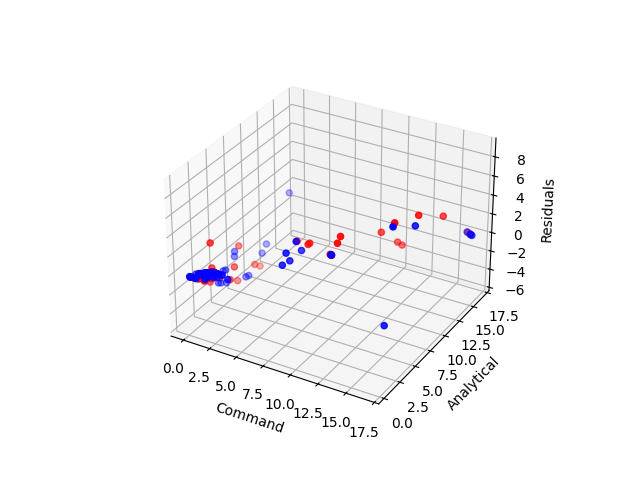

In [12]:
# 3d plot in matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(val_data_batch[:, 0], val_data_batch[:, 1], val_data_label.flatten(), c='r', marker='o')
ax.scatter(data_batch[:, 0], data_batch[:, 1], data_label.flatten(), c='b', marker='o')
ax.set_xlabel('Command')
ax.set_ylabel('Analytical')
ax.set_zlabel('Residuals')
plt.show()